### Analysing empirical lighting data to generate an efficiency conversion

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import math
sns.set_theme()
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 300

LED_data = {'luminance_levels': [1.35, 1.00, 0.86, 0.75, 0.63, 0.50, 0.40],
            'power_consumption': [73.1, 49.8, 39.9, 33.9, 27.1, 20.8, 16.9],
            'power_factor': [0.94, 0.90, 0.87, 0.83, 0.78, 0.70, 0.61],
            }
LED_df = pd.DataFrame(LED_data, columns=['luminance_levels', 'power_consumption', 'power_factor'])
max_luminance = 1.50
LED_df['percentage_dimmed']=LED_df.luminance_levels/max_luminance*100

new_row = {'luminance_levels':1.50, 'power_consumption':80, 'power_factor':np.nan, 'percentage_dimmed':100}
#append row to the dataframe
LED_df = LED_df.append(new_row, ignore_index=True)

y = 0.89486 * x + -9.43821


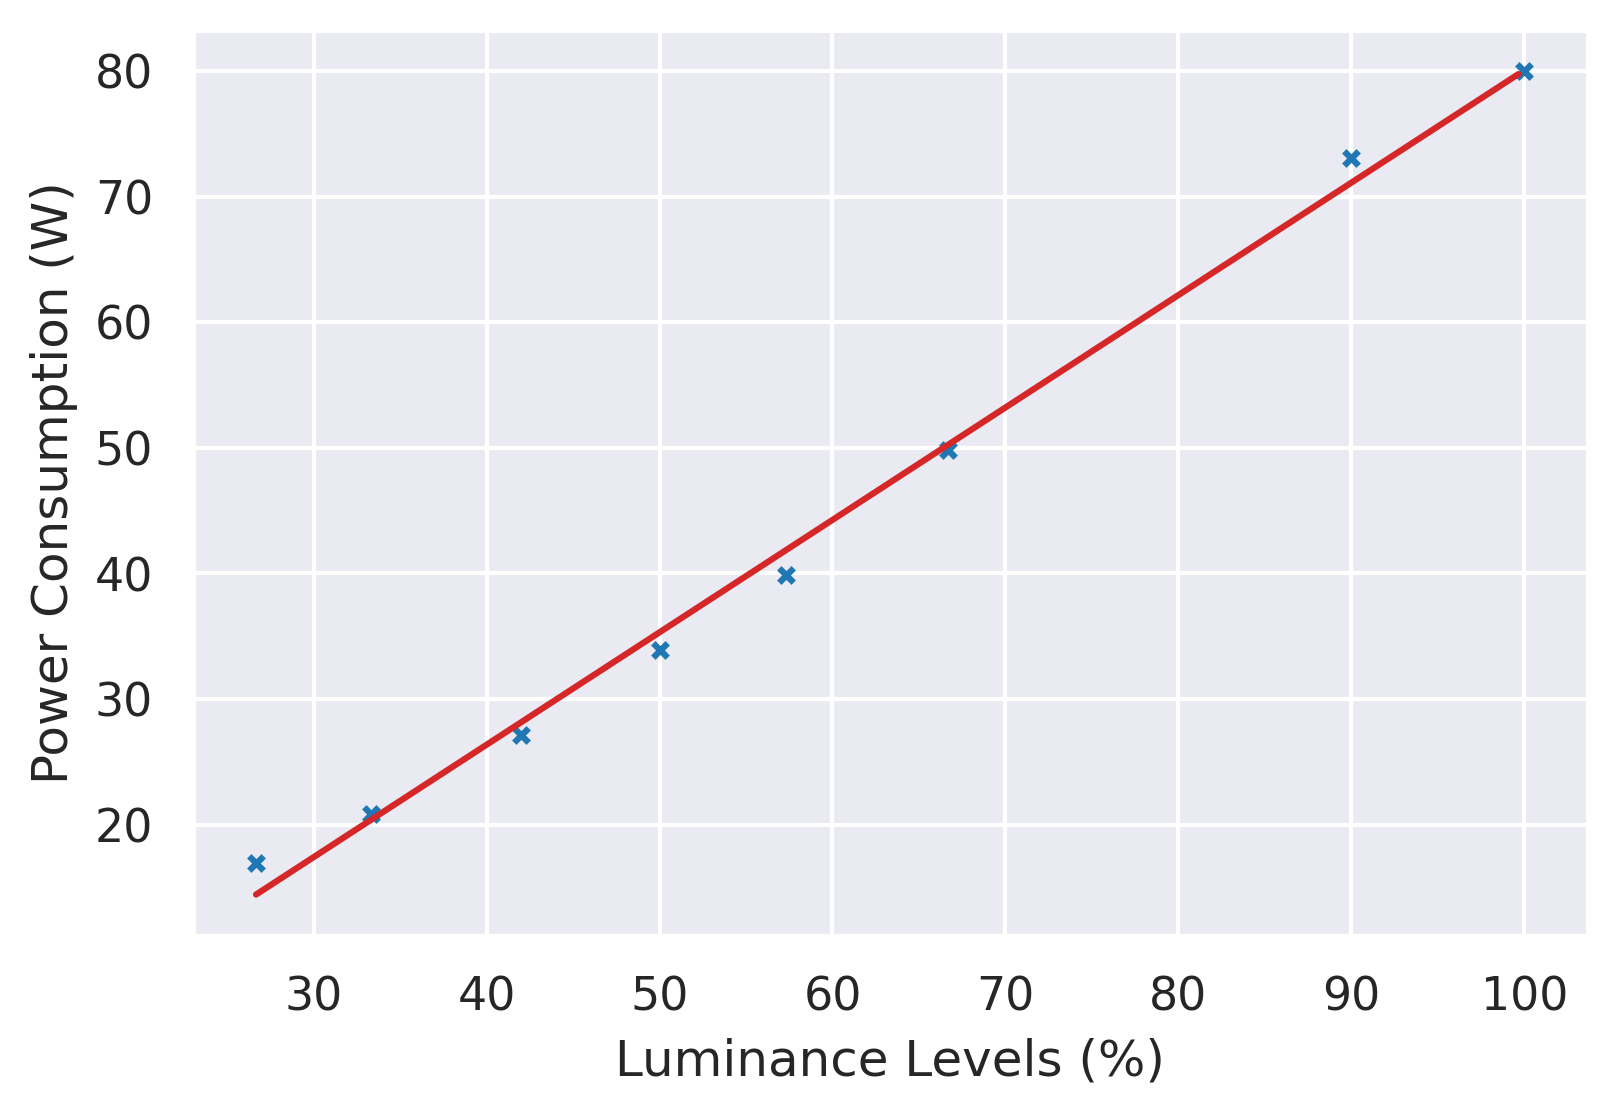

In [14]:
# define the true objective function
def linear(x, a, b):
	return a * x + b

x = np.array(LED_df.percentage_dimmed)
y = np.array(LED_df.power_consumption)

# curve fit
popt, _ = curve_fit(linear, x, y)
# summarize the parameter values
a1, b1 = popt

print('y = %.5f * x + %.5f' % (a1, b1))

# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), 100, 1)
# calculate the output for the range
y_line = linear(x_line, a1, b1)

plt.scatter(LED_df.percentage_dimmed, LED_df.power_consumption, c="tab:blue", s=12, marker='x')
plt.plot(x_line, y_line, c='tab:red')
plt.xlabel('Luminance Levels (%)')
plt.ylabel('Power Consumption (W)')
plt.grid(True)

time_str = time.strftime("%y%m%d_%H%M")
plt.savefig("img/power_illuminance_linear_" + time_str + ".png")
plt.show()

In [15]:
test_val = 100
y_pred = a1*test_val + b1
print('Prediction for %.2f%% is %.2f Watts' % (test_val, y_pred))

test_val = 0
y_pred = a1*test_val + b1
print('Prediction for %.2f%% is %.2f Watts' % (test_val, y_pred))

Prediction for 100.00% is 80.05 Watts
Prediction for 0.00% is -9.44 Watts


y = -0.55855 * x + 0.02323 * x^2 + -0.00011 * x^3 + 17.67097


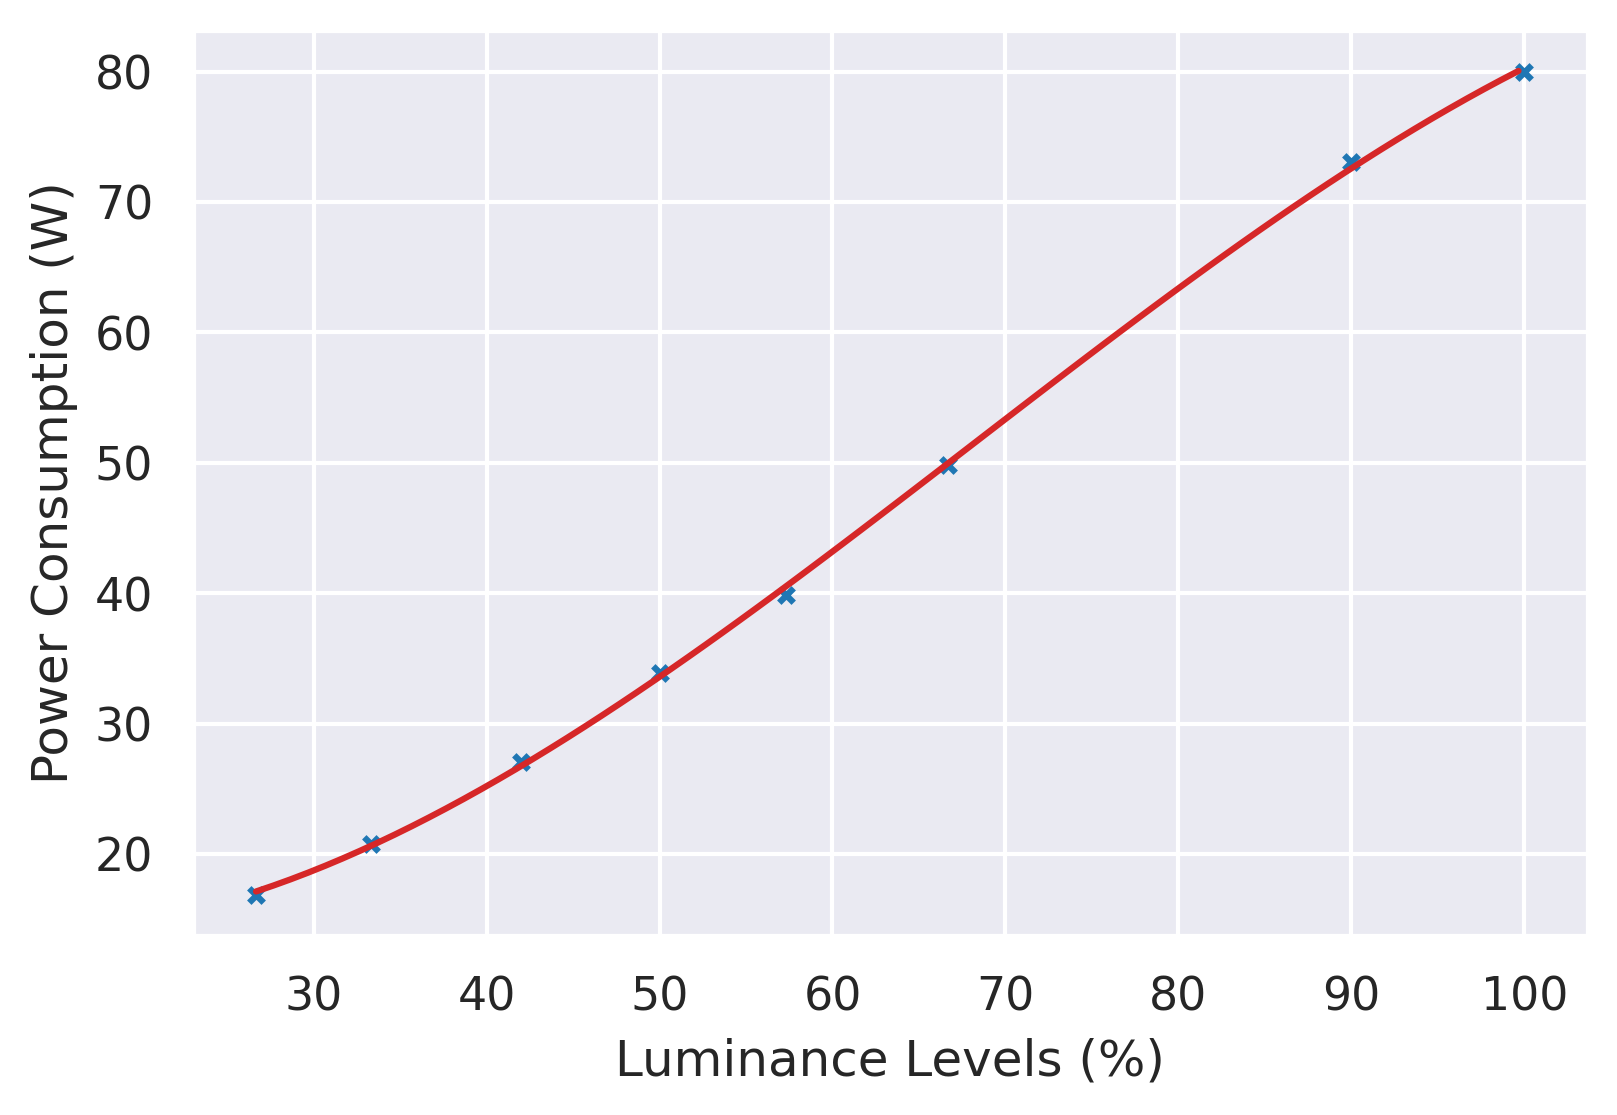

In [16]:
# define the true objective function
def objective(x, a, b, c, d):
	return a * x + b * x**2 + c * x**3 + d

x = np.array(LED_df.percentage_dimmed)
y = np.array(LED_df.power_consumption)

# curve fit
popt, pcov = curve_fit(objective, x, y)
# summarize the parameter values
a2, b2, c2, d2 = popt

print('y = %.5f * x + %.5f * x^2 + %.5f * x^3 + %.5f' % (a2, b2, c2, d2))

# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), 100, 1)
# calculate the output for the range
y_line = objective(x_line, a2, b2, c2, d2)

plt.scatter(LED_df.percentage_dimmed, LED_df.power_consumption, c="tab:blue", s=12, marker='x')
plt.plot(x_line, y_line, c='tab:red')
plt.xlabel('Luminance Levels (%)')
plt.ylabel('Power Consumption (W)')
plt.grid(True)

time_str = time.strftime("%y%m%d_%H%M")
plt.savefig("img/power_illuminance_cubic_" + time_str + ".png")
plt.show()

In [17]:
test_val = 100
y_pred_nl = a2*test_val + b2*test_val**2 + c2*test_val**3 + d2
print('Prediction for %.2f%% is %.2f Watts' % (test_val, y_pred_nl))

test_val = 0
y_pred_nl = a2*test_val + b2*test_val**2 + c2*test_val**3 + d2
print('Prediction for %.2f%% is %.2f Watts' % (test_val, y_pred_nl))

Prediction for 100.00% is 80.28 Watts
Prediction for 0.00% is 17.67 Watts


In [20]:
y_nl_predict = objective(x, a2, b2, c2, d2)
y_predict = linear(x, a1, b1)

r2 = r2_score(y, y_predict)
r2_nl = r2_score(y, y_nl_predict)

print('linear model r^2: %.6f' % r2)
print('non-linear model r^2: %.6f' % r2_nl)

linear model r^2: 0.995465
non-linear model r^2: 0.999715


In [44]:
cell_boundaries = np.array([0, 2.25, 4.5, 6.75, 9, 11.25, 13.5, 15.75, 18])
angles = np.degrees(np.arctan(cell_boundaries/8))
hyps = np.sqrt(cell_boundaries**2 + 8**2)
cd_klms = np.array([340, 340, 340, 350, 400, 480, 540, 580, 620])
cds = cd_klms*7.921
luxs = cds/(hyps**2)

averaged_luxs = np.array([])
for i in range(0,4):
    averaged_luxs = np.append(averaged_luxs, np.average(luxs[i*2:(i*2)+2]))

full_luxs = np.append(np.flip(luxs), luxs[1:])
U0 = 100*np.min(luxs)/np.average(full_luxs)
print('Approximation of uniform luminance is %.2f%% across the range' % U0)

comparative_luxs = np.around(averaged_luxs/np.max(averaged_luxs), 3)
for lux in comparative_luxs:
    print(lux)

Approximation of uniform luminance is 52.78% across the range
1.0
0.706
0.516
0.396
